<a href="https://colab.research.google.com/github/hkolgur/UOH/blob/main/Marketing_Mix_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import drive

In [137]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df=pd.read_csv("/content/drive/My Drive/UOH/Marketing_Mix_Models/Advertising.csv")

In [140]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Notes On Marketing:

Marketing and Advertising Channels:  Ad-click (on click of ad pay) . Ad-Impression( process of showing  an add) ,Search Ads( when searched for specific Intent then the add is shown) Display ad(Banner ad shown on page you visit based on your past behavior). Tv Ads, Print ( page 3, sports page etc) .Outdoor advertising( Hoardings,busses..),Email marketing, fb ads, YouTube ads etc.. Digital and Non-digital ads .

Suppose an ad is shown on Fb , then Youtube, Google, Instagram ..etc and finally they purchased that product. Q: How much of the amount that was attributed to each of these channels have helped customer to buy this product? Based on this we can spend on that channel more

Rule Based Attribution: 
Gut Feel Driven: (Eg Ad-click contributed more than Ad-Impression), Search ads more influential than display ads.
Examples of Rule Based systems:
1. Last Event Attribution Model  -Imp given to last one ( fb ad, YouTube ad, G-search click ) Imp given to G-Search click. Impulse Buy(display of chocolate at billing counter)
2. Last Non-Direct Click: user comes to Amazon and purchase. Prior to this if he went to YouTube and saw the ad then credit given to YouTube
3. Last G-search Ad
4. First Interaction : Eg luxury product /new product  will have more impact
5. Time of the Day Attribution:
6. Position based Attribution model: 40% to first and last interaction , all others 20% credit

Data Driven Sytems/Models : 

1. Can we get from raw-data itself to know how much % credit to which channel using stat sensible methods and if that co-relates to  Intution.
 
Alternate names for Attribution Models: Multi channel attribution , Marketing mix modeling: 100K sales last week ..how much can it attribute to tv ads, 100$ of news ads etc..


Regression Based Mix Model:  If we have weekly data on spent and sales made for each channel .
For every week we have Xi<Tvi, Radioi, newsi ..> yi= salesi   for 100 weeks if you have data.
Linear Regression Model: Salesi = wo + w1tv1i + w2 Radio I + w3-news paper 
Salesi = 100k + 2 * tv + 1* radio +0.5 * news paper + Error (eg 10k)  - > we can decide spending on Tv gives double revenue than Radio etc. If you don’t send on anything then you get 100k only.
RF , GBDT , NN can be used 

Feature Importance can come either form 
Model Specific Feature Importance: weights in linear, how many times each feature is split for GBDT  etc
Model Agnostic Feature Importance: LIME and SHAP

Problems: we encounter problems like time varying sales (festivals /Holidays)	solution: Add features related to seasonality eg day of week , time of day etc
Carry Over Effect: Eg you show ad last week and get sale this week  etc . Hack: example 10% attribution to last weeks sale .


Game Theory:
Existing Problem: Feature Importance are very useful but are not perfect. 
Technique used to solve in Game Theory is :  Shapely Values (Noble prize in 2012)- Gives mathematical guarantees and 	rigorous foundations
Co-Operative Games: Shapely values falls into this idea. 
Question: Out of a team of players at end how much of the value is to be attributed to each of the player? 
n number of players:
N is set of all players. A=Coalition is subset of the players
Characteristic Function (v): is a power set of all the  2**N is power set : { null. {1} ,{1,2}…}
v(A) -> Takes a coalition and returns a real valued number

How to design this coalition function v ? -Ex :1) Total sales generate by colation set ( sales generated by TV and Radio)  2) P(conversion | A) using ML-model : LR,NB,RF,GBD

Shapely Values Intuition and Math:
Shapely value of ith channel = How much credit to be given to channel-i given v(A) and N={1,2,3..n}

Sum across all subsets S that belong to N  except {I}  . Char function v of sum of all subsets including i  minus sum of all subsets of S .
Divide by n C |s|  to give equal value to each of the subset of a given size. Eg. If set size is large adding one more Chanel will give less incremental value compared to if the set size is just one and adding one more channel to it. Hence divide by nCr to give a specific weitage  that is equal to sets of same sizes. (Set of 3 will have one weitage , set of 2 will have other  weitiage , sets of 1 will have different weitage )  . Eg: we have TV, Radio, News then set of 2 will be {TV, 

Eg; shapely values of 5th player for a sub set of size 3 is : |S| =3 , v({1,2,3} U {5} - v({1,2,3})  divide by nCr 


Limitations of Shapely values: Exponential time complexity 

In [142]:
df.head(2)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [143]:
#Delete Unnamed column 
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [144]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


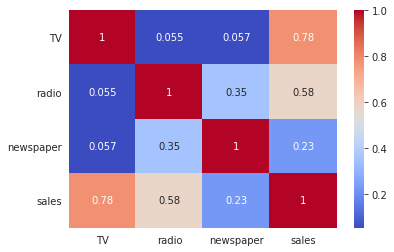

In [145]:
#check the co-relation of features 
corr=df.corr()
#sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(252, 20, as_cmap=True))
sns.heatmap(corr,annot=True,cmap='coolwarm')


#### Observation: we see Feature TV is highly co-realated to Sales

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

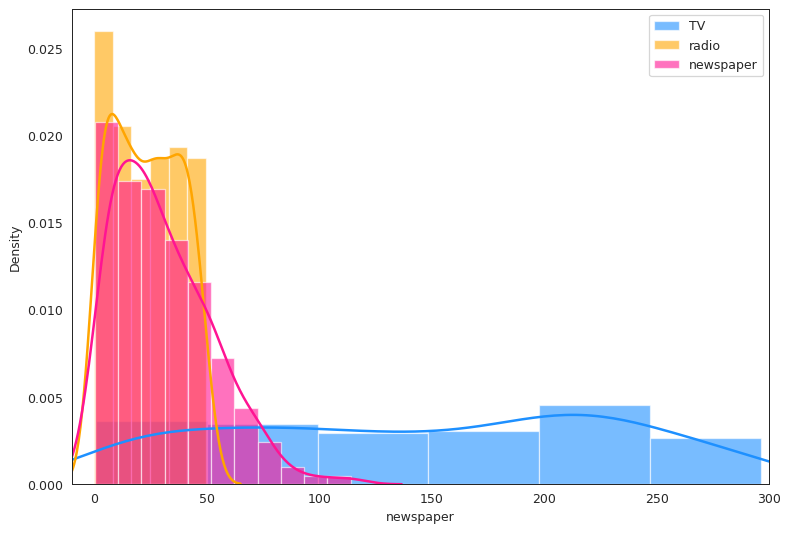

In [146]:
#Lets see the distributions of TV,Radio and NewsPaper 
sns.set_style("white")
plt.figure(figsize=(10,7),dpi=90,edgecolor='blue')
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
x1=df['TV']
x2=df['radio']
x3=df['newspaper']

sns.distplot(x1, color="dodgerblue", label="TV", **kwargs)
sns.distplot(x2, color="orange", label="radio", **kwargs)
sns.distplot(x3, color="deeppink", label="newspaper", **kwargs)
plt.xlim(-10,300)
#sns.displot(data=df[['TV','radio','newspaper']],label=['TV','radio','newspaper'],**kwargs)
plt.legend();


####Observation:we see the range of  feature radio/News paper is from 0 and < 150.The maximum value for TV is near 300.
The range of TV contibution/sales is wide compared to radio/news paper

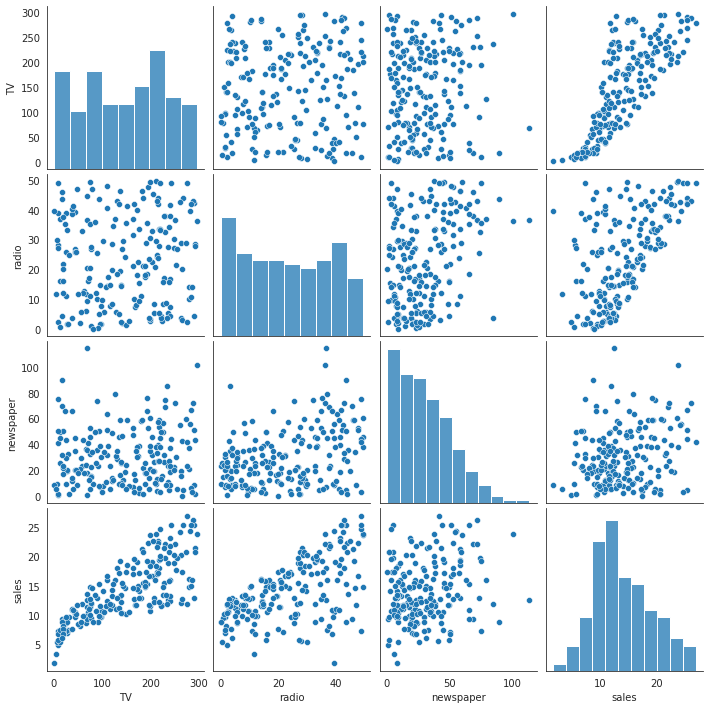

In [147]:
#Lets plot some pair plots:
sns.pairplot(df)

### Observation: we see corelation between TV and Sales is high

## Train Test Split

In [148]:

from sklearn.model_selection import train_test_split

X=df.loc[:,df.columns!='sales']
Y=df['sales']
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=.2,random_state=42) 


##Lets try to get Feature importance by fitting Random Forest

In [149]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

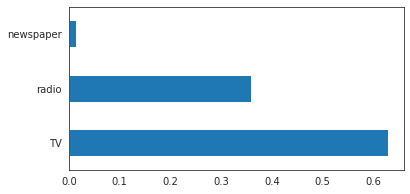

In [150]:
#Get the Feature Importance
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.plot(kind='barh',figsize=(6,3))

In [151]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
mape = np.mean(np.abs((y_test - pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.6702749999999995
Mean Squared Error (MSE): 0.6452802250000007
Root Mean Squared Error (RMSE): 0.8032933617303212
Mean Absolute Percentage Error (MAPE): 5.98
Accuracy: 94.02


In [152]:
#Notes: Mean Apsolute Error : 
#np.abs(y_test)
#np.abs(y_test-pred)/np.abs(y_test)
np.mean(np.abs(y_test-pred)/np.abs(y_test)) 

0.0598391633893427

### Observation: Clearly TV feature has high importance followed by radion and then news paper

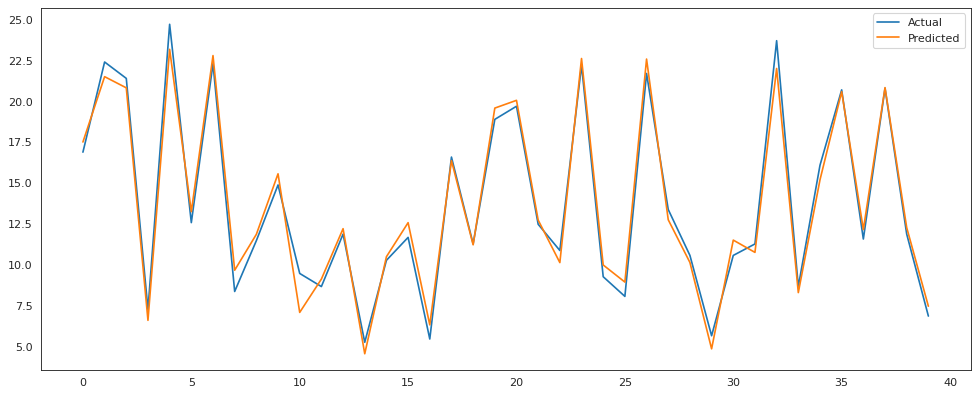

In [153]:
# Creating Line Graph for Predictions

from matplotlib.pyplot import figure

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
#Create a Temporary data frame with y_actuals and predictions form RF model 
#lets convert y_test series into a numpy and get rid of indexes
y_test_np=np.array(y_test)
df_temp_rf = pd.DataFrame({'Actual': y_test_np, 'Predicted':pred})
df_temp_rf.reset_index(drop=True)
plt.plot(df_temp_rf['Actual'], label = 'Actual')
plt.plot(df_temp_rf['Predicted'], label = 'Predicted')
plt.legend()
plt.show()

##### Observation: We see the predictions from Random Forest model are pretty good 

### Lets Implement the OLS model to estimate the parameters in a linear regression model

In [154]:
import statsmodels.formula.api as sm

model_ols = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        19:41:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

#####Observation: R-squared is 0.897, which means that almost 90 of all variations in our data can be explained by our model. p-values for TV and radio are less than 0, but the p-value for newspaper is 0.860, which indicates that newspaper spend has no significant impact on sales

In [155]:
# Defining Actual and Predicted values .
#From Ols model lets get predictions and plot a graph
y_pred = model_ols.predict()
sales = df['sales']
df_temp = pd.DataFrame({'Actual': sales, 'Predicted':y_pred})
df_temp.head()


,Actual,Predicted
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672


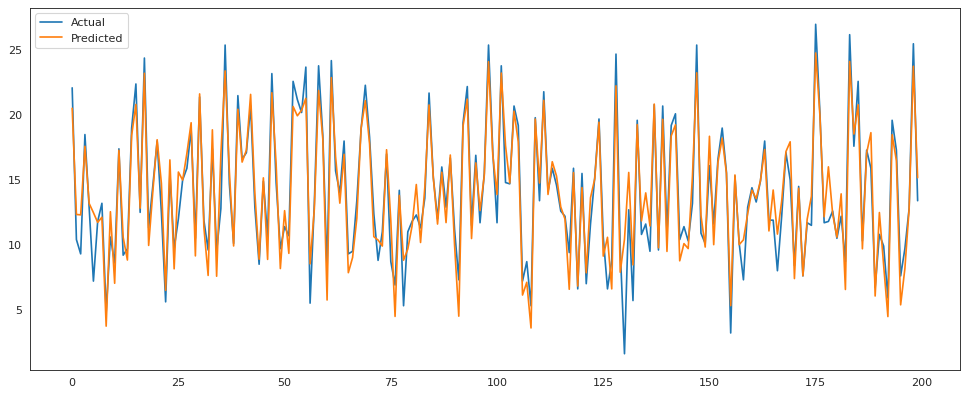

In [156]:
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

##### Observation: OLS Model does pretty good predicting sales given TV, radio, and newspaper spend.